EXAMEN

In [105]:
from lxml import html
import requests
import codecs
import Levenshtein
import pandas as pd
import numpy as np

Ariketa 1

In [106]:
page = requests.get('https://dreguera.github.io/')
tree = html.fromstring(page.content)

In [107]:
b = tree.xpath("//div[@id='content']/text()")

In [108]:
b

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN',
 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers',
 'Si, la verdad es que da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡metros, OPTICS y DBSCAN son mÃ¡s Ã³ptimos',
 'El tema del clutering por densidad me parece super interesante pero no se si tendrÃ\xada aplicabilidad en el Reto 7',
 'Creo que podrÃ\xadamos traer a una empresa para que les hablara de HDBSCAN',
 'Guay! me parece super interesante y puede ser super enriquecedor',
 'Perfecto']

In [109]:
import string
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize, sent_tokenize

from lxml import html
import requests
import codecs

import gensim


a)

In [153]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(b[0])
for line in tokens:
    file_docs.append(line)
    
tokens = sent_tokenize(b[2])
for line in tokens:
    file_docs2.append(line)

In [154]:
file_docs

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?']

In [155]:
file_docs2

['MeanShift para clustering por densidad habeis visto?',
 'Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers']

In [156]:

gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('a',tf_idf[corpus],
                                        num_features=len(dictionary))

for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))

{',': 0, '?': 1, 'algoritmos': 2, 'aprendizaje': 3, 'bastante': 4, 'bien': 5, 'clase': 6, 'clustering': 7, 'corrigiendo': 8, 'dado': 9, 'data': 10, 'de': 11, 'en': 12, 'estado': 13, 'han': 14, 'has': 15, 'he': 16, 'la': 17, 'los': 18, 'no': 19, 'parte': 20, 'realizado': 21, 'science': 22, 'supervisado': 23, 'trabajos': 24, 'y': 25, 'â¿quã©': 26}


In [157]:
print(f'La similitud entre estos mensjes es de este %: {float(sum_of_sims / len(file_docs)) * 100}')

La similitud entre estos mensjes es de este %: 0.0


b)

In [158]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(b[1])
for line in tokens:
    file_docs.append(line) 
    
tokens = sent_tokenize(b[3])
for line in tokens:
    file_docs2.append(line)

In [159]:

gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('a',tf_idf[corpus],
                                        num_features=len(dictionary))

for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))

{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'de': 5, 'densidad': 6, 'el': 7, 'en': 8, 'he': 9, 'hola': 10, 'la': 11, 'me': 12, 'no': 13, 'parte': 14, 'por': 15, 'sobre': 16, 'supervisado': 17, 'todo': 18, 'dbscan': 19, 'hdscan': 20, 'hemos': 21, 'optics': 22, 'visto': 23, 'y': 24}


In [160]:
print(f'La similitud entre estos mensjes es de este %: {float(sum_of_sims / len(file_docs)) * 100}')

La similitud entre estos mensjes es de este %: 37.14512884616852


c)

In [164]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(b[1]) 
for line in tokens:
    file_docs.append(line)
    
tokens = sent_tokenize(b[4])
for line in tokens:
    file_docs2.append(line)

In [165]:

gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('a',tf_idf[corpus],
                                        num_features=len(dictionary))

for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))

{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'de': 5, 'densidad': 6, 'el': 7, 'en': 8, 'he': 9, 'hola': 10, 'la': 11, 'me': 12, 'no': 13, 'parte': 14, 'por': 15, 'sobre': 16, 'supervisado': 17, 'todo': 18, 'dbscan': 19, 'hdscan': 20, 'hemos': 21, 'optics': 22, 'visto': 23, 'y': 24}


In [166]:
print(f'La similitud entre estos mensjes es de este %: {float(sum_of_sims / len(file_docs)) * 100}')

La similitud entre estos mensjes es de este %: 29.09572124481201


d) 

In [167]:
b

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN',
 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers',
 'Si, la verdad es que da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡metros, OPTICS y DBSCAN son mÃ¡s Ã³ptimos',
 'El tema del clutering por densidad me parece super interesante pero no se si tendrÃ\xada aplicabilidad en el Reto 7',
 'Creo que podrÃ\xadamos traer a una empresa para que les hablara de HDBSCAN',
 'Guay! me parece super interesante y puede ser super enriquecedor',
 'Perfecto']

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [169]:
vectorizer = CountVectorizer().fit_transform(b) #fit transform pasa a 0,1...
vectors = vectorizer.toarray() #calcula la matriz de vectores
csim=cosine_similarity(vectors)

In [170]:
csim

array([[1.        , 0.40567404, 0.03194383, 0.16574839, 0.07377111,
        0.13093073, 0.        , 0.        ],
       [0.40567404, 1.        , 0.18898224, 0.15689291, 0.34914862,
        0.05163978, 0.06030227, 0.        ],
       [0.03194383, 0.18898224, 1.        , 0.1111874 , 0.12371791,
        0.14638501, 0.05698029, 0.        ],
       [0.16574839, 0.15689291, 0.1111874 , 1.        , 0.12838815,
        0.15191091, 0.        , 0.        ],
       [0.07377111, 0.34914862, 0.12371791, 0.12838815, 1.        ,
        0.        , 0.32897585, 0.        ],
       [0.13093073, 0.05163978, 0.14638501, 0.15191091, 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.06030227, 0.05698029, 0.        , 0.32897585,
        0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

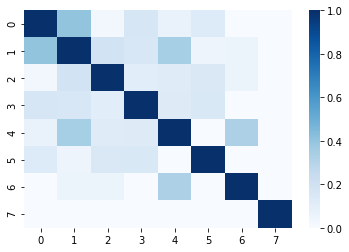

In [129]:
import seaborn as sns
ax = sns.heatmap(csim, cmap='Blues')

Se puede observar que la primera frase (posicion 0) y la segunda frase (posición 1) son los mensajes que mas se asemejan con valor de 0.4065 

In [177]:
print("Mensaje de posicion 0 =", b[0])
print("Mensaje de posicion 1 =", b[1])

Mensaje de posicion 0 = He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?
Mensaje de posicion 1 = Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN


Ariketa 2

In [286]:
df = pd.read_csv("C:/Users/madar/Desktop/Mikel/2020-21/DS/exxxx/subirnotamikelm/Spotify-2000.csv")

In [287]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [288]:
def combined_features(row):
    return row['Artist']+" "+row['Top Genre']
df["combined_features"] = df.apply(combined_features, axis =1)

In [289]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,combined_features
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Norah Jones adult standards
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Deep Purple album rock
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Gorillaz alternative hip hop
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Foo Fighters alternative metal
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Bruce Springsteen classic rock


In [290]:
df1 = list(combined_features(df))

In [291]:
df1

['Norah Jones adult standards',
 'Deep Purple album rock',
 'Gorillaz alternative hip hop',
 'Foo Fighters alternative metal',
 'Bruce Springsteen classic rock',
 'City To City alternative pop rock',
 'Maroon 5 pop',
 'Muse modern rock',
 'The Killers modern rock',
 'Eminem detroit hip hop',
 'Elvis Presley adult standards',
 'The White Stripes alternative rock',
 'De Dijk dutch indie',
 'Ten Years After album rock',
 'Arctic Monkeys garage rock',
 'Paul de Leeuw dutch cabaret',
 'Coldplay permanent wave',
 'Alanis Morissette alternative rock',
 'John Miles classic uk pop',
 'Justin Timberlake dance pop',
 'Coldplay permanent wave',
 'Mumford & Sons modern folk rock',
 'Jan Smit dutch pop',
 'The Killers modern rock',
 'BLØF dutch pop',
 'Ilse DeLange dutch americana',
 'Editors alternative dance',
 'Eminem detroit hip hop',
 'Herbert Grönemeyer german pop',
 "Youssou N'Dour afropop",
 'Coldplay permanent wave',
 'Robert Plant album rock',
 'Adele british soul',
 'Norah Jones adult sta

In [292]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
import string

In [293]:
vectorizer = CountVectorizer().fit_transform(df1) #fit transform pasa a 0,1...
vectors = vectorizer.toarray() #calcula la matriz de vectores
csim=cosine_similarity(vectors)

In [294]:
csim

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ],
       [0.  , 1.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.25, 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.5 , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [295]:
movie_index = 5

In [296]:
similar_movies = list(enumerate(csim[movie_index])) 

In [297]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [298]:
sorted_similar_movies

[(5, 0.9999999999999998),
 (235, 0.6123724356957945),
 (1047, 0.5303300858899106),
 (1056, 0.5303300858899106),
 (1505, 0.5303300858899106),
 (1415, 0.4999999999999999),
 (1426, 0.4999999999999999),
 (1527, 0.4999999999999999),
 (1555, 0.4999999999999999),
 (1570, 0.4999999999999999),
 (1574, 0.4999999999999999),
 (1579, 0.4999999999999999),
 (1586, 0.4999999999999999),
 (1594, 0.4999999999999999),
 (286, 0.47434164902525683),
 (873, 0.47434164902525683),
 (1764, 0.47434164902525683),
 (1777, 0.47434164902525683),
 (700, 0.4330127018922194),
 (704, 0.4330127018922194),
 (232, 0.408248290463863),
 (237, 0.408248290463863),
 (243, 0.408248290463863),
 (790, 0.408248290463863),
 (1491, 0.408248290463863),
 (1519, 0.408248290463863),
 (1528, 0.408248290463863),
 (1534, 0.408248290463863),
 (1553, 0.408248290463863),
 (1602, 0.408248290463863),
 (1614, 0.408248290463863),
 (1625, 0.408248290463863),
 (1629, 0.408248290463863),
 (1635, 0.408248290463863),
 (1637, 0.408248290463863),
 (1653, 

In [301]:
def get_title_from_index(Index):
    return df[df.Index == Index]["Title"].values[0]

In [302]:
get_title_from_index(5)

"Waitin' On A Sunny Day"

In [304]:
def get_artist_from_index(Index):
    return df[df.Index == Index]["Artist"].values[0]

In [305]:
get_artist_from_index(5)

'Bruce Springsteen'

In [324]:
for song in sorted_similar_movies[1:6]: 
    print(get_title_from_index(song[0]), "-> Artista:", get_artist_from_index(song[0]))

Piano Man -> Artista: Billy Joel
Wonderful Tonight -> Artista: Eric Clapton
I Feel Love -> Artista: Donna Summer
Hunger Strike -> Artista: Temple Of The Dog
The Way You Make Me Feel - 2012 Remaster -> Artista: Michael Jackson
